# IMEC2001 Herramientas Computacionales 
## Clase 13 - Modelamiento desde datos


## TABLA DE CONTENIDO

- 1.1. Incertidumbre con la librería `uncertainties`
- 1.2. Modelos Estadísticos con `scipy.stats`
- 1.3. Machine Learning con sklearn
- 1.4. Clasificación con K-Nearest Neighbors (KNN)

En esta clase se exploran varias técnicas y operaciones fundamentales con OpenCV que permitirán comenzar a trabajar en el procesamiento y análisis de imágenes.
Este cuaderno cubre la manipulación básica hasta conceptos más avanzados como detección de contornos y transformaciones morfológicas. 


## 1.1 Incertidumbre con la librería `uncertainties`

La librería `uncertainties` permite manejar cálculos con incertidumbres (errores) de manera automática. Es especialmente útil en el ámbito científico e ingenieril donde las mediciones tienen asociadas ciertas incertidumbres.

In [2]:
!pip install uncertainties
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for uncertainties from https://files.pythonhosted.org/packages/13/f7/9d94eeea3f6475456fb5c6b72d3a3cc652c1ecd342c5491274cbfc9ebaab/uncertainties-3.1.7-py2.py3-none-any.whl.metadata
  Obtaining dependency information for future from https://files.pythonhosted.org/packages/da/71/ae30dadffc90b9006d77af76b393cb9dfbfc9629f339fc1574a1c52e6806/future-1.0.0-py3-none-any.whl.metadata
Using cached uncertainties-3.1.7-py2.py3-none-any.whl (98 kB)
   ---------------------------------------- 0.0/491.3 kB ? eta -:--:--
    --------------------------------------- 10.2/491.3 kB ? eta -:--:--
   -- ------------------------------------ 30.7/491.3 kB 660.6 kB/s eta 0:00:01
   -- ------------------------------------ 30.7/491.3 kB 660.6 kB/s eta 0:00:01
   --- ----------------------------------- 41.0/491.3 kB 219.4 kB/s eta 0:00:03
   ---- ---------------------------------- 61.4/491.3 kB 297.7 kB/s eta 0:00:02
   -------- ----------------------------- 112.6/491.3 kB 437.6


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from uncertainties import ufloat

# Definimos dos medidas con sus respectivas incertidumbres
x = ufloat(20, 2)  # x = 20 ± 2
y = ufloat(30, 3)  # y = 30 ± 3

# Operaciones básicas mantienen la propagación del error
z = x + y  
print(z)  

w = x * y  
print(w)


type(x)

50+/-4
(6.0+/-0.8)e+02


uncertainties.core.Variable

In [11]:
import numpy as np
x%y

20.0+/-2.0

## 1.2. Modelos Estadísticos con `scipy.stats`

Vamos a generar algunos datos aleatorios siguiendo una distribución normal y luego ajustaremos estos datos a una distribución utilizando `scipy.stats`. 

En este código se genera un histograma de los datos aleatorios y superpone la curva de densidad de probabilidad del ajuste realizado. Es una forma sencilla pero poderosa de visualizar cómo se ajustan los datos a una distribución teórica.

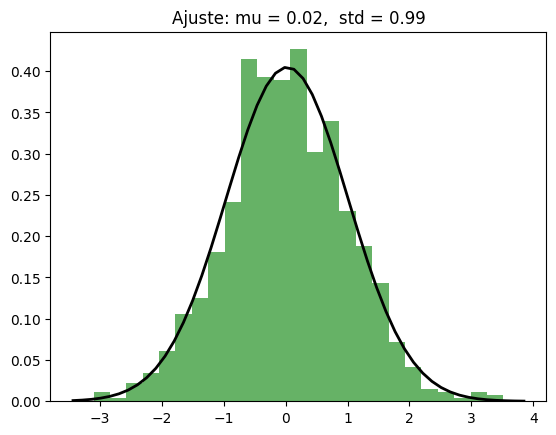

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

# Generamos datos aleatorios
data = np.random.normal(loc=0, scale=1, size=1000)

# Ajustamos los datos a una distribución normal 
mu_estimado , std_estimado = norm.fit(data)

# Graficamos los resultados 
plt.hist(data,bins=25,density=True,alpha=0.6,color='g')

xmin,xmax=plt.xlim()
x=np.linspace(xmin,xmax)
p=norm.pdf(x,mu_estimado,std_estimado)

plt.plot(x, p, 'k', linewidth=2)
title = "Ajuste: mu = %.2f,  std = %.2f" % (mu_estimado, std_estimado)
plt.title(title)

plt.show()

In [28]:
#mu_estimado , std_estimado 
import scipy
from scipy.optimize import fsolve

def search_fun(x):
    return scipy.stats.norm.cdf(x)-0.000000001
    
fsolve(search_fun,-2)



array([-5.99780702])

## 1.3. Machine Learning con `sklearn`

La base de todos los algoritmos modernos de aprendizaje es, esencialmente, el Aprendizaje Estadístico. Dentro del campo del aprendizaje estadístico se encuentra el aprendizaje automático (machine learning). Un subconjunto del aprendizaje automático incluye el aprendizaje profundo (deep learning), es decir, tenemos una jerarquía que podría representarse como Aprendizaje Estadístico (Aprendizaje Automático (Aprendizaje Profundo)).

Si observamos en detalle la esencia de lo que se está aprendiendo en estos campos, nos daremos cuenta de que se trata simplemente de una distribución multivariante compleja con una forma algo nebulosa. Y debido a que es multivariante (captura múltiples influencias), existe dentro de un espacio de alta dimensión.

Para desglosarlo más claramente:

- **Aprendizaje Estadístico**: Este término abarca todas las técnicas y métodos donde utilizamos conceptos estadísticos para inferir patrones o hacer predicciones a partir de datos. Es la base sobre la cual se construyen metodologías más específicas como el machine learning y deep learning.

- **Machine Learning**: Como parte del aprendizaje estadístico, el machine learning enfoca sus técnicas hacia algoritmos capaces de aprender a realizar tareas sin ser explícitamente programados para cada situación específica. Utiliza grandes cantidades de datos para "aprender" cómo resolver problemas o tomar decisiones basadas en ejemplos pasados.

- **Deep Learning**: El deep learning es un subcampo aún más especializado dentro del machine learning. Se caracteriza por utilizar redes neuronales profundas —estructuras inspiradas en cómo funcionan las neuronas en el cerebro humano— para modelar relaciones muy complejas entre los datos. Gracias a su capacidad para manejar enormes volúmenes de información y capturar características intrincadas, ha logrado avances significativos en áreas como reconocimiento visual y procesamiento natural del lenguaje.

Cuando hablamos acerca del "aprendido", nos referimos fundamentalmente a entender y modelar distribuciones multivariantes complejas; estas son representaciones matemáticas que pueden describir cómo varias variables interactúan entre sí dentro un conjunto grande de datos. 

Scikit-learn es probablemente la librería más popular para Machine Learning en Python. Ofrece herramientas simples y eficientes para análisis predictivo y modelado estadístico.

En este ejemplo vamos a crear un modelo simple usando regresión lineal para predecir resultados basados en un conjunto único predictor.


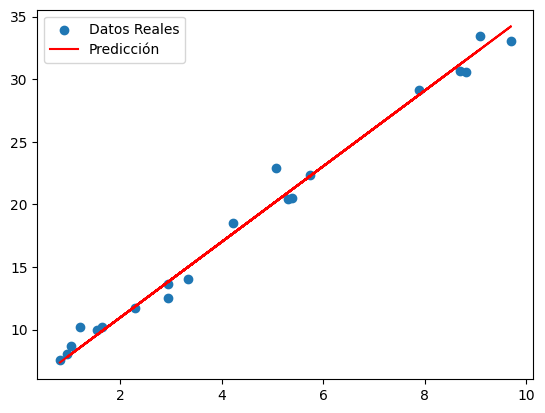

Coeficiente: [[3.02100813]]
Intercepto: [4.93225542]


In [29]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Generamos algunos datos sintéticos
X = 10 * np.random.rand(100,1)
y = 3 * X + np.random.randn(100,1) + 5

# Dividimos los datos en entrenamiento y prueba 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Creamos el modelo y lo entrenamos 
model=LinearRegression()
model.fit(X_train,y_train)

# Realizamos predicciones sobre el conjunto de prueba 
predictions=model.predict(X_test)

# Visualizamos las predicciones comparadas con los valores reales 
plt.scatter(X_test,y_test,label='Datos Reales')
plt.plot(X_test,predictions,color='red',label='Predicción')
plt.legend()
plt.show()

print("Coeficiente:", model.coef_)
print("Intercepto:", model.intercept_)


En este ejemplo generamos primero unos datos sintéticos que siguen aproximadamente una relación lineal. Luego dividimos estos datos en conjuntos de entrenamiento y prueba. Entrenamos nuestro modelo (`LinearRegression`) con los datos de entrenamiento y realizamos predicciones sobre el conjunto de prueba. Finalmente visualizamos estas predicciones comparándolas con los valores reales para tener una idea de cómo se desempeña el modelo. También imprimimos el coeficiente e intercepto del modelo, que representan la pendiente y el punto donde la línea de regresión cruza el eje Y, respectivamente.

## 1.4. Clasificación con K-Nearest Neighbors (KNN)

Otro problema común en Machine Learning es la clasificación. Vamos a ver un ejemplo usando el algoritmo K-Nearest Neighbors (KNN), que es intuitivo y fácil de entender.

En este caso utilizamos `load_iris` desde `sklearn.datasets` para cargar un conjunto de datos popular utilizado frecuentemente como introducción a técnicas de clasificación. El dataset Iris contiene medidas físicas para tres especies diferentes de flores del género Iris. Nuestro objetivo es construir un modelo capaz de predecir la especie basada en estas medidas físicas.

Después dividimos nuestros datos entre conjuntos para entrenamiento y prueba. Utilizamos entonces `KNeighborsClassifier` para crear nuestro modelo especificando \(k=3\), lo cual significa que miraremos los 3 vecinos más cercanos cuando hagamos nuestras predicciones. Finalmente evaluamos nuestra precisión sobre el conjunto no visto durante entrenamiento (conjunto de prueba).

In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Cargamos un conjunto de datos predefinido 
iris = load_iris()
X = iris.data
y = iris.target

# Dividimos los datos en entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creamos el modelo KNN con k=3 
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenamos nuestro modelo 
knn.fit(X_train,y_train)

# Evaluamos su precisión sobre el conjunto de prueba 
accuracy=knn.score(X_test,y_test)
print(f'Precisión del Modelo: {accuracy*100:.2f}%')


Precisión del Modelo: 93.33%


In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])